In [1]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

In [2]:
state = np.random.RandomState(6669)
villages = np.random.uniform(0, 10, size=(20,2))

In [20]:
#station[0] = stationX location
#station[1] = stationY location
#station[2] = station max euclidean distance (obj variable)
station = cp.Variable(3)

#minimize the max euclidean distance to all villages
obj = cp.Minimize(station[2])

#for each village, add a constraint that is an SOC constraint on station[2] to the station location
constraints = []
for village in villages:
    constraints.append(cp.SOC(station[2], station[:2]-village))

prob = cp.Problem(obj, constraints)
prob.solve()

print("Station X Location: {0:.4f}".format(station[0].value))
print("Station Y Location: {0:.4f}".format(station[1].value))
print("Station Minimum Longest Distance: {0:.4f}".format(prob.value))


Station X Location: 5.2601
Station Y Location: 5.1207
Station Minimum Longest Distance: 5.8353


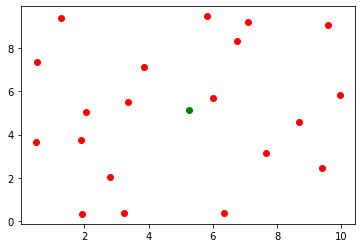

In [21]:
plt.scatter(villages[:, 0], villages[:, 1], color='red')
plt.scatter(station[:1].value, station[1:2].value, c='green')
plt.show()